In [56]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Start coding!

In [57]:
# Reading in and exploring the dataset
car_insurance = pd.read_csv('car_insurance.csv')
print(car_insurance.info())
print(car_insurance.isna().sum())
car_insurance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


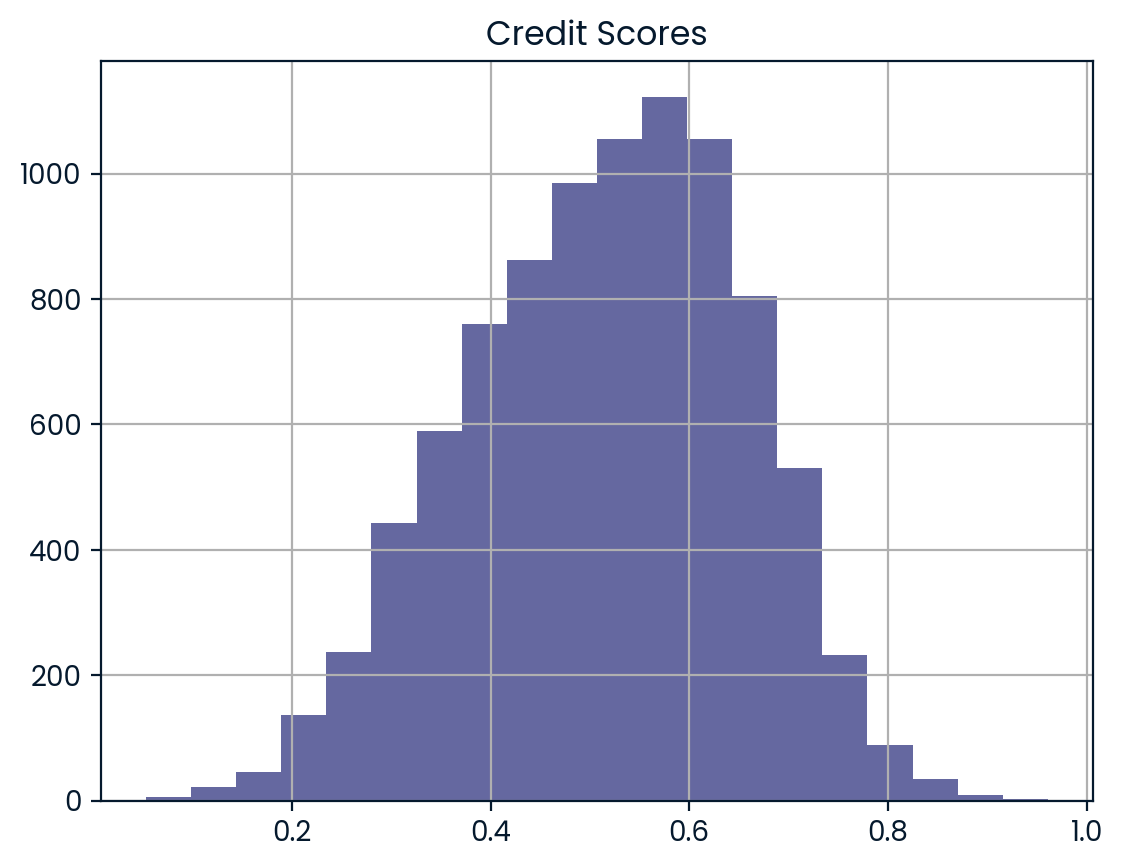

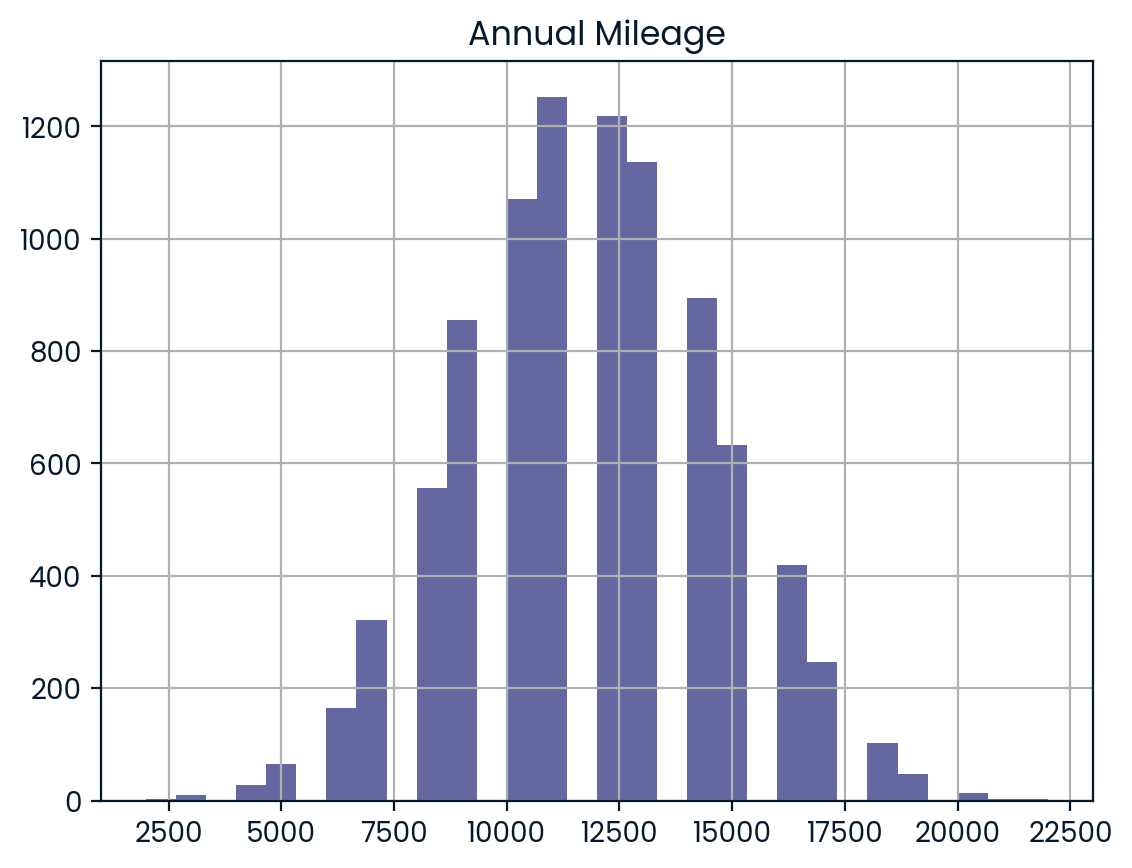

In [58]:
import matplotlib.pyplot as plt

# Visualizing the distribution for columns with missing values
car_insurance['credit_score'].hist(bins=20)
plt.title('Credit Scores')
plt.show()

car_insurance['annual_mileage'].hist(bins=30)
plt.title('Annual Mileage')
plt.show()

In [59]:
# Filling the missing values (considering the data as normally distributed)

credit_score_mean = car_insurance['credit_score'].mean()
car_insurance['credit_score'].fillna(credit_score_mean, inplace=True)

annual_mileage_mean = car_insurance['annual_mileage'].mean()
car_insurance['annual_mileage'].fillna(annual_mileage_mean, inplace=True)

print(car_insurance.isna().sum())

id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64


In [60]:
# Preparing for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = car_insurance.drop(columns=['outcome', 'id'])  # Features
y = car_insurance['outcome']  # Target variable

models = []
    

In [61]:
# Loop through features and create Logistic Regression models
from sklearn.preprocessing import LabelEncoder

features = X.columns
models = []

for feature in features:
    model = LogisticRegression()
    
    # Check if the feature is of type object (categorical)
    if X[feature].dtype == 'object':
        # Encode the categorical feature
        le = LabelEncoder()
        X[feature] = le.fit_transform(X[feature])
    
    model.fit(X[[feature]], y)
    models.append((feature, model))

In [62]:
# Measuring performance

accuracies = []
confusion_matrices = []

for i in range(len(models)):
    feature, model = models[i]
    
    # Predict using the model
    y_pred = model.predict(X[[feature]])
    
    # Calculate confusion matrix
    cm = confusion_matrix(y, y_pred)
    confusion_matrices.append((feature, cm))
    
    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    accuracies.append((feature, accuracy))

In [63]:
# Finding the best performing model

# Identifying the index of the highest accuracy
best_feature_index = accuracies.index(max(accuracies, key=lambda x: x[1]))

# Mapping the highest accuracy to the feature
best_feature, best_accuracy = accuracies[best_feature_index]

best_feature_df = pd.DataFrame({'best_feature':best_feature, 'best_accuracy': [best_accuracy]})

best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.7771
